In [2]:
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

In [16]:
# Define input variables
stop_distance = FuzzyVariable(
    universe_range=(0, 10),
    terms={
        "very_close": ("trapmf", 0, 0, 2, 4),
        "close": ("trimf", 2, 4, 6),
        "medium": ("trimf", 4, 6, 8),
        "far": ("trapmf", 6, 8, 10, 10)
    }
)

vehicle_speed = FuzzyVariable(
    universe_range=(0, 40),
    terms={
        "very_slow": ("trapmf", 0, 0, 5, 10),
        "slow": ("trimf", 5, 10, 20),
        "medium": ("trimf", 15, 25, 35),
        "fast": ("trapmf", 30, 35, 40, 40)
    }
)

# Define output variable
braking_signal = FuzzyVariable(
    universe_range=(0, 1),
    terms={
        "light": ("trapmf", 0, 0, 0.2, 0.4),
        "moderate": ("trimf", 0.3, 0.5, 0.7),
        "strong": ("trimf", 0.6, 0.8, 1),
        "emergency": ("trapmf", 0.8, 0.9, 1, 1)
    }
)

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

fuzzy_system = DecompositionalInference(
    composition_operator="max-min",
    production_link="min",
    and_operator="min",
    or_operator="max",
    implication_operator="min",
    defuzzification_operator="cog",
)

# Function to get braking signal
def get_braking_signal(distance, speed):
    input_values = {
        "stop_distance": distance,
        "vehicle_speed": speed
    }
    result = fuzzy_system.inference(
        fuzzy_variables=[stop_distance, vehicle_speed, braking_signal],
        rules=rules,
        input_values=input_values
    )
    return result["braking_signal"]

In [17]:
get_braking_signal(5, 20)  # 0.5

AttributeError: 'DecompositionalInference' object has no attribute 'inference'

In [8]:
# Test the system
distances = np.linspace(0, 10, 11)
speeds = np.linspace(0, 40, 41)
braking_signals = np.zeros((len(distances), len(speeds)))

for i, distance in enumerate(distances):
    for j, speed in enumerate(speeds):
        braking_signals[i, j] = get_braking_signal(distance, speed)

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(speeds, distances)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, braking_signals, cmap='viridis')

ax.set_xlabel('Vehicle Speed [Km/h]')
ax.set_ylabel('Stop Distance [m]')
ax.set_zlabel('Braking Signal [0-1]')
ax.set_title('Fuzzy Braking System')

plt.colorbar(surf)
plt.show()

AttributeError: 'DecompositionalInference' object has no attribute 'inference'

In [1]:
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

# Define input variables
stop_distance = FuzzyVariable(
    universe_range=(0, 10),
    terms={
        "very_close": ("trapmf", 0, 0, 2, 4),
        "close": ("trimf", 2, 4, 6),
        "medium": ("trimf", 4, 6, 8),
        "far": ("trapmf", 6, 8, 10, 10)
    }
)

vehicle_speed = FuzzyVariable(
    universe_range=(0, 40),
    terms={
        "very_slow": ("trapmf", 0, 0, 5, 10),
        "slow": ("trimf", 5, 10, 20),
        "medium": ("trimf", 15, 25, 35),
        "fast": ("trapmf", 30, 35, 40, 40)
    }
)

# Define output variable
braking_signal = FuzzyVariable(
    universe_range=(0, 1),
    terms={
        "light": ("trapmf", 0, 0, 0.2, 0.4),
        "moderate": ("trimf", 0.3, 0.5, 0.7),
        "strong": ("trimf", 0.6, 0.8, 1),
        "emergency": ("trapmf", 0.8, 0.9, 1, 1)
    }
)

# Collect all variables
variables = [stop_distance, vehicle_speed, braking_signal]

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Function to get braking signal
def get_braking_signal(distance, speed):
    result, _ = model(
        variables=variables,
        rules=rules,
        stop_distance=distance,
        vehicle_speed=speed
    )
    return result['braking_signal']

# Test the system
distances = np.linspace(0, 10, 11)
speeds = np.linspace(0, 40, 41)
braking_signals = np.zeros((len(distances), len(speeds)))

for i, distance in enumerate(distances):
    for j, speed in enumerate(speeds):
        braking_signals[i, j] = get_braking_signal(distance, speed)

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(speeds, distances)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, braking_signals, cmap='viridis')

ax.set_xlabel('Vehicle Speed [Km/h]')
ax.set_ylabel('Stop Distance [m]')
ax.set_zlabel('Braking Signal [0-1]')
ax.set_title('Fuzzy Braking System')

plt.colorbar(surf)
plt.show()

# Example usage
example_distance = 5
example_speed = 20
example_result, certainty = model(
    variables=variables,
    rules=rules,
    stop_distance=example_distance,
    vehicle_speed=example_speed
)
print(f"For distance {example_distance}m and speed {example_speed}km/h:")
print(f"Braking signal: {example_result['braking_signal']}")
print(f"Certainty: {certainty}")

TypeError: list indices must be integers or slices, not str

In [2]:
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

# Define input variables
stop_distance = FuzzyVariable(
    name="stop_distance",
    universe_range=(0, 10),
    terms={
        "very_close": ("trapmf", 0, 0, 2, 4),
        "close": ("trimf", 2, 4, 6),
        "medium": ("trimf", 4, 6, 8),
        "far": ("trapmf", 6, 8, 10, 10)
    }
)

vehicle_speed = FuzzyVariable(
    name="vehicle_speed",
    universe_range=(0, 40),
    terms={
        "very_slow": ("trapmf", 0, 0, 5, 10),
        "slow": ("trimf", 5, 10, 20),
        "medium": ("trimf", 15, 25, 35),
        "fast": ("trapmf", 30, 35, 40, 40)
    }
)

# Define output variable
braking_signal = FuzzyVariable(
    name="braking_signal",
    universe_range=(0, 1),
    terms={
        "light": ("trapmf", 0, 0, 0.2, 0.4),
        "moderate": ("trimf", 0.3, 0.5, 0.7),
        "strong": ("trimf", 0.6, 0.8, 1),
        "emergency": ("trapmf", 0.8, 0.9, 1, 1)
    }
)

# Collect all variables
variables = [stop_distance, vehicle_speed, braking_signal]

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Function to get braking signal
def get_braking_signal(distance, speed):
    result, _ = model(
        variables=variables,
        rules=rules,
        stop_distance=distance,
        vehicle_speed=speed
    )
    return result['braking_signal']

# Test the system
distances = np.linspace(0, 10, 11)
speeds = np.linspace(0, 40, 41)
braking_signals = np.zeros((len(distances), len(speeds)))

for i, distance in enumerate(distances):
    for j, speed in enumerate(speeds):
        braking_signals[i, j] = get_braking_signal(distance, speed)

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(speeds, distances)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, braking_signals, cmap='viridis')

ax.set_xlabel('Vehicle Speed [Km/h]')
ax.set_ylabel('Stop Distance [m]')
ax.set_zlabel('Braking Signal [0-1]')
ax.set_title('Fuzzy Braking System')

plt.colorbar(surf)
plt.show()

# Example usage
example_distance = 5
example_speed = 20
example_result, certainty = model(
    variables=variables,
    rules=rules,
    stop_distance=example_distance,
    vehicle_speed=example_speed
)
print(f"For distance {example_distance}m and speed {example_speed}km/h:")
print(f"Braking signal: {example_result['braking_signal']}")
print(f"Certainty: {certainty}")

TypeError: __init__() got an unexpected keyword argument 'name'

In [3]:
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

# Define input variables
stop_distance = FuzzyVariable(
    universe_range=(0, 10),
    terms={
        "very_close": ("trapmf", 0, 0, 2, 4),
        "close": ("trimf", 2, 4, 6),
        "medium": ("trimf", 4, 6, 8),
        "far": ("trapmf", 6, 8, 10, 10)
    }
)

vehicle_speed = FuzzyVariable(
    universe_range=(0, 40),
    terms={
        "very_slow": ("trapmf", 0, 0, 5, 10),
        "slow": ("trimf", 5, 10, 20),
        "medium": ("trimf", 15, 25, 35),
        "fast": ("trapmf", 30, 35, 40, 40)
    }
)

# Define output variable
braking_signal = FuzzyVariable(
    universe_range=(0, 1),
    terms={
        "light": ("trapmf", 0, 0, 0.2, 0.4),
        "moderate": ("trimf", 0.3, 0.5, 0.7),
        "strong": ("trimf", 0.6, 0.8, 1),
        "emergency": ("trapmf", 0.8, 0.9, 1, 1)
    }
)

# Collect all variables
variables = {
    "stop_distance": stop_distance,
    "vehicle_speed": vehicle_speed,
    "braking_signal": braking_signal
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Function to get braking signal
def get_braking_signal(distance, speed):
    result, _ = model(
        variables=variables,
        rules=rules,
        stop_distance=distance,
        vehicle_speed=speed
    )
    return result['braking_signal']

# Test the system
distances = np.linspace(0, 10, 11)
speeds = np.linspace(0, 40, 41)
braking_signals = np.zeros((len(distances), len(speeds)))

for i, distance in enumerate(distances):
    for j, speed in enumerate(speeds):
        braking_signals[i, j] = get_braking_signal(distance, speed)

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(speeds, distances)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, braking_signals, cmap='viridis')

ax.set_xlabel('Vehicle Speed [Km/h]')
ax.set_ylabel('Stop Distance [m]')
ax.set_zlabel('Braking Signal [0-1]')
ax.set_title('Fuzzy Braking System')

plt.colorbar(surf)
plt.show()

# Example usage
example_distance = 5
example_speed = 20
example_result, certainty = model(
    variables=variables,
    rules=rules,
    stop_distance=example_distance,
    vehicle_speed=example_speed
)
print(f"For distance {example_distance}m and speed {example_speed}km/h:")
print(f"Braking signal: {example_result['braking_signal']}")
print(f"Certainty: {certainty}")

KeyError: 'slow'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

# Define variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": [(0, 1), (2, 1), (4, 0)],
            "close": [(2, 0), (4, 1), (6, 0)],
            "medium": [(4, 0), (6, 1), (8, 0)],
            "far": [(6, 0), (8, 1), (10, 1)]
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": [(0, 1), (5, 1), (10, 0)],
            "slow": [(5, 0), (10, 1), (20, 0)],
            "medium": [(15, 0), (25, 1), (35, 0)],
            "fast": [(30, 0), (35, 1), (40, 1)]
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": [(0, 1), (0.2, 1), (0.4, 0)],
            "moderate": [(0.3, 0), (0.5, 1), (0.7, 0)],
            "strong": [(0.6, 0), (0.8, 1), (1, 1)],
            "emergency": [(0.8, 0), (0.9, 1), (1, 1)]
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Function to get braking signal
def get_braking_signal(distance, speed):
    result, _ = model(
        variables=variables,
        rules=rules,
        stop_distance=distance,
        vehicle_speed=speed
    )
    return result['braking_signal']

# Test the system
distances = np.linspace(0, 10, 11)
speeds = np.linspace(0, 40, 41)
braking_signals = np.zeros((len(distances), len(speeds)))

for i, distance in enumerate(distances):
    for j, speed in enumerate(speeds):
        braking_signals[i, j] = get_braking_signal(distance, speed)

# Visualization
X, Y = np.meshgrid(speeds, distances)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, braking_signals, cmap='viridis')

ax.set_xlabel('Vehicle Speed [Km/h]')
ax.set_ylabel('Stop Distance [m]')
ax.set_zlabel('Braking Signal [0-1]')
ax.set_title('Fuzzy Braking System')

plt.colorbar(surf)
plt.show()

# Example usage
example_distance = 5
example_speed = 20
example_result, certainty = model(
    variables=variables,
    rules=rules,
    stop_distance=example_distance,
    vehicle_speed=example_speed
)
print(f"For distance {example_distance}m and speed {example_speed}km/h:")
print(f"Braking signal: {example_result['braking_signal']}")
print(f"Certainty: {certainty}")

# Plot membership functions
plt.figure(figsize=(15, 5))
plt.subplot(131)
variables["stop_distance"].plot()
plt.title("Stop Distance")
plt.subplot(132)
variables["vehicle_speed"].plot()
plt.title("Vehicle Speed")
plt.subplot(133)
variables["braking_signal"].plot()
plt.title("Braking Signal")
plt.tight_layout()
plt.show()

KeyError: 'slow'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

# Define variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": [(0, 1), (2, 1), (4, 0)],
            "close": [(2, 0), (4, 1), (6, 0)],
            "medium": [(4, 0), (6, 1), (8, 0)],
            "far": [(6, 0), (8, 1), (10, 1)]
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": [(0, 1), (5, 1), (10, 0)],
            "slow": [(5, 0), (10, 1), (20, 0)],
            "medium": [(15, 0), (25, 1), (35, 0)],
            "fast": [(30, 0), (35, 1), (40, 1)]
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": [(0, 1), (0.2, 1), (0.4, 0)],
            "moderate": [(0.3, 0), (0.5, 1), (0.7, 0)],
            "strong": [(0.6, 0), (0.8, 1), (1, 0)],
            "emergency": [(0.8, 0), (0.9, 1), (1, 1)]
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Function to get braking signal
def get_braking_signal(distance, speed):
    result, _ = model(
        variables=variables,
        rules=rules,
        stop_distance=distance,
        vehicle_speed=speed
    )
    return result['braking_signal']

# Test the system
distances = np.linspace(0, 10, 11)
speeds = np.linspace(0, 40, 41)
braking_signals = np.zeros((len(distances), len(speeds)))

for i, distance in enumerate(distances):
    for j, speed in enumerate(speeds):
        braking_signals[i, j] = get_braking_signal(distance, speed)

# Visualization
X, Y = np.meshgrid(speeds, distances)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, braking_signals, cmap='viridis')

ax.set_xlabel('Vehicle Speed [Km/h]')
ax.set_ylabel('Stop Distance [m]')
ax.set_zlabel('Braking Signal [0-1]')
ax.set_title('Fuzzy Braking System')

plt.colorbar(surf)
plt.show()

# Example usage
example_distance = 5
example_speed = 20
example_result, certainty = model(
    variables=variables,
    rules=rules,
    stop_distance=example_distance,
    vehicle_speed=example_speed
)
print(f"For distance {example_distance}m and speed {example_speed}km/h:")
print(f"Braking signal: {example_result['braking_signal']}")
print(f"Certainty: {certainty}")

# Plot membership functions
plt.figure(figsize=(15, 5))
plt.subplot(131)
variables["stop_distance"].plot()
plt.title("Stop Distance")
plt.subplot(132)
variables["vehicle_speed"].plot()
plt.title("Vehicle Speed")
plt.subplot(133)
variables["braking_signal"].plot()
plt.title("Braking Signal")
plt.tight_layout()
plt.show()

KeyError: 'slow'

Variables:
  stop_distance: dict_keys(['very_close', 'close', 'medium', 'far'])
  vehicle_speed: dict_keys(['very_slow', 'slow', 'medium', 'fast'])
  braking_signal: dict_keys(['light', 'moderate', 'strong', 'emergency'])

Rules:
  Rule 1: [('stop_distance', 'far'), ('vehicle_speed', 'slow')] -> [('braking_signal', 'light')]
  Rule 2: [('stop_distance', 'medium'), ('vehicle_speed', 'medium')] -> [('braking_signal', 'moderate')]
  Rule 3: [('stop_distance', 'close'), ('vehicle_speed', 'fast')] -> [('braking_signal', 'strong')]
  Rule 4: [('stop_distance', 'very_close'), ('vehicle_speed', 'fast')] -> [('braking_signal', 'emergency')]
Error in get_braking_signal: 'slow'

For distance 5m and speed 20km/h:
Failed to compute braking signal


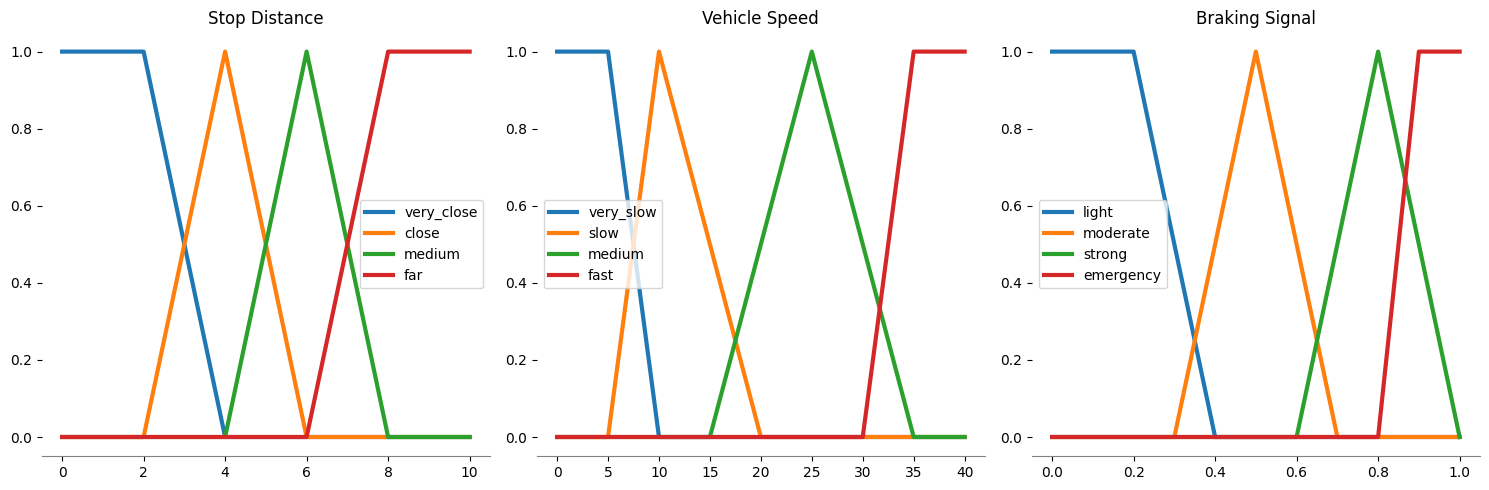

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

# Define variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": ("trapmf", 0, 0, 2, 4),
            "close": ("trimf", 2, 4, 6),
            "medium": ("trimf", 4, 6, 8),
            "far": ("trapmf", 6, 8, 10, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": ("trapmf", 0, 0, 5, 10),
            "slow": ("trimf", 5, 10, 20),
            "medium": ("trimf", 15, 25, 35),
            "fast": ("trapmf", 30, 35, 40, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trapmf", 0, 0, 0.2, 0.4),
            "moderate": ("trimf", 0.3, 0.5, 0.7),
            "strong": ("trimf", 0.6, 0.8, 1),
            "emergency": ("trapmf", 0.8, 0.9, 1, 1)
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Debug information
print("Variables:")
for var_name, var in variables.items():
    print(f"  {var_name}: {var.terms.keys()}")

print("\nRules:")
for i, rule in enumerate(rules):
    print(f"  Rule {i+1}: {rule.premise} -> {rule.consequence}")

# Function to get braking signal
def get_braking_signal(distance, speed):
    try:
        result, _ = model(
            variables=variables,
            rules=rules,
            stop_distance=distance,
            vehicle_speed=speed
        )
        return result['braking_signal']
    except Exception as e:
        print(f"Error in get_braking_signal: {e}")
        return None

# Test the system
example_distance = 5
example_speed = 20
example_result = get_braking_signal(example_distance, example_speed)

print(f"\nFor distance {example_distance}m and speed {example_speed}km/h:")
if example_result is not None:
    print(f"Braking signal: {example_result}")
else:
    print("Failed to compute braking signal")

# Plot membership functions
plt.figure(figsize=(15, 5))
plt.subplot(131)
variables["stop_distance"].plot()
plt.title("Stop Distance")
plt.subplot(132)
variables["vehicle_speed"].plot()
plt.title("Vehicle Speed")
plt.subplot(133)
variables["braking_signal"].plot()
plt.title("Braking Signal")
plt.tight_layout()
plt.show()

Variables:
  stop_distance: dict_keys(['very_close', 'close', 'medium', 'far'])
  vehicle_speed: dict_keys(['very_slow', 'slow', 'medium', 'fast'])
  braking_signal: dict_keys(['light', 'moderate', 'strong', 'emergency'])

Rules:
  Rule 1: [('stop_distance', 'far'), ('vehicle_speed', 'slow')] -> [('braking_signal', 'light')]
  Rule 2: [('stop_distance', 'medium'), ('vehicle_speed', 'medium')] -> [('braking_signal', 'moderate')]
  Rule 3: [('stop_distance', 'close'), ('vehicle_speed', 'fast')] -> [('braking_signal', 'strong')]
  Rule 4: [('stop_distance', 'very_close'), ('vehicle_speed', 'fast')] -> [('braking_signal', 'emergency')]
Error in get_braking_signal: 'slow'
Traceback:

For distance 5m and speed 20km/h:
Failed to compute braking signal


Traceback (most recent call last):
  File "/tmp/ipykernel_18668/206750791.py", line 81, in get_braking_signal
    result, _ = model(
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 112, in __call__
    self._compute_modified_premise_memberships()
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 199, in _compute_modified_premise_memberships
    rule.modified_premise_memberships[fuzzyvar] = self.variables[
KeyError: 'slow'


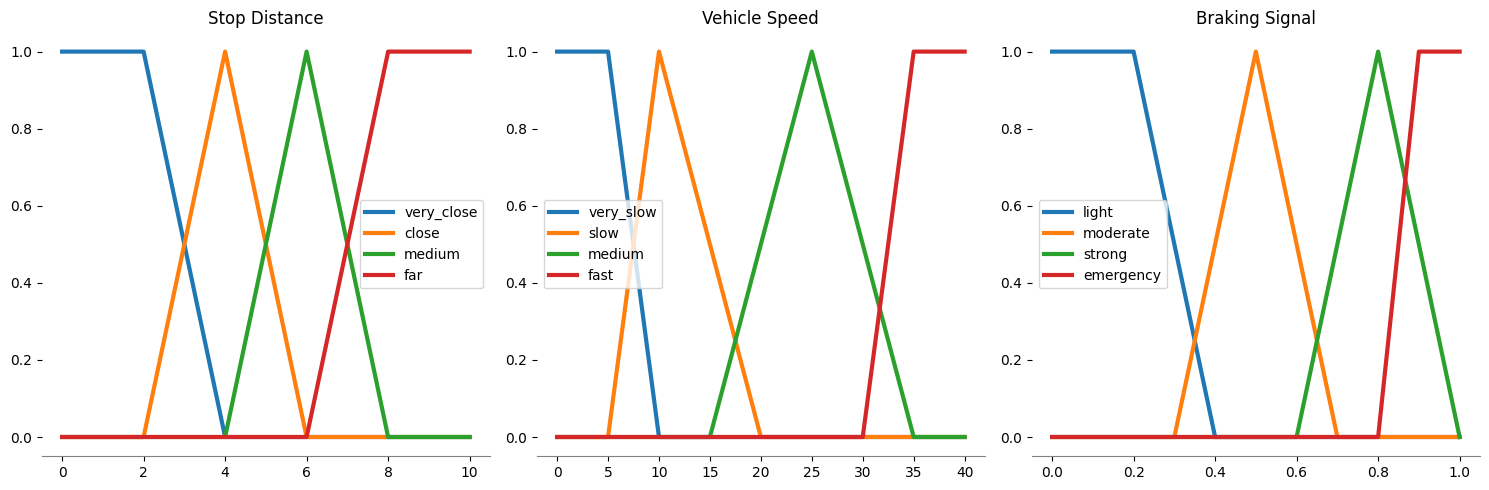

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
import traceback

# Define variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": ("trapmf", 0, 0, 2, 4),
            "close": ("trimf", 2, 4, 6),
            "medium": ("trimf", 4, 6, 8),
            "far": ("trapmf", 6, 8, 10, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": ("trapmf", 0, 0, 5, 10),
            "slow": ("trimf", 5, 10, 20),
            "medium": ("trimf", 15, 25, 35),
            "fast": ("trapmf", 30, 35, 40, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trapmf", 0, 0, 0.2, 0.4),
            "moderate": ("trimf", 0.3, 0.5, 0.7),
            "strong": ("trimf", 0.6, 0.8, 1),
            "emergency": ("trapmf", 0.8, 0.9, 1, 1)
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Debug information
print("Variables:")
for var_name, var in variables.items():
    print(f"  {var_name}: {var.terms.keys()}")

print("\nRules:")
for i, rule in enumerate(rules):
    print(f"  Rule {i+1}: {rule.premise} -> {rule.consequence}")

# Function to get braking signal
def get_braking_signal(distance, speed):
    try:
        result, _ = model(
            variables=variables,
            rules=rules,
            stop_distance=distance,
            vehicle_speed=speed
        )
        return result['braking_signal']
    except Exception as e:
        print(f"Error in get_braking_signal: {e}")
        print("Traceback:")
        traceback.print_exc()
        return None

# Test the system
example_distance = 5
example_speed = 20
example_result = get_braking_signal(example_distance, example_speed)

print(f"\nFor distance {example_distance}m and speed {example_speed}km/h:")
if example_result is not None:
    print(f"Braking signal: {example_result}")
else:
    print("Failed to compute braking signal")

# Plot membership functions
try:
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    variables["stop_distance"].plot()
    plt.title("Stop Distance")
    plt.subplot(132)
    variables["vehicle_speed"].plot()
    plt.title("Vehicle Speed")
    plt.subplot(133)
    variables["braking_signal"].plot()
    plt.title("Braking Signal")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting membership functions: {e}")
    traceback.print_exc()

Variables:
  stop_distance: dict_keys(['close', 'far'])
  vehicle_speed: dict_keys(['slow', 'fast'])
  braking_signal: dict_keys(['light', 'strong'])

Rules:
  Rule 1: [('stop_distance', 'far'), ('vehicle_speed', 'slow')] -> [('braking_signal', 'light')]
  Rule 2: [('stop_distance', 'close'), ('vehicle_speed', 'fast')] -> [('braking_signal', 'strong')]

Computing braking signal for distance=5, speed=20
Error in get_braking_signal: 'slow'
Traceback:

For distance 5m and speed 20km/h:
Failed to compute braking signal


Traceback (most recent call last):
  File "/tmp/ipykernel_18668/590840513.py", line 68, in get_braking_signal
    result, _ = model(
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 112, in __call__
    self._compute_modified_premise_memberships()
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 199, in _compute_modified_premise_memberships
    rule.modified_premise_memberships[fuzzyvar] = self.variables[
KeyError: 'slow'


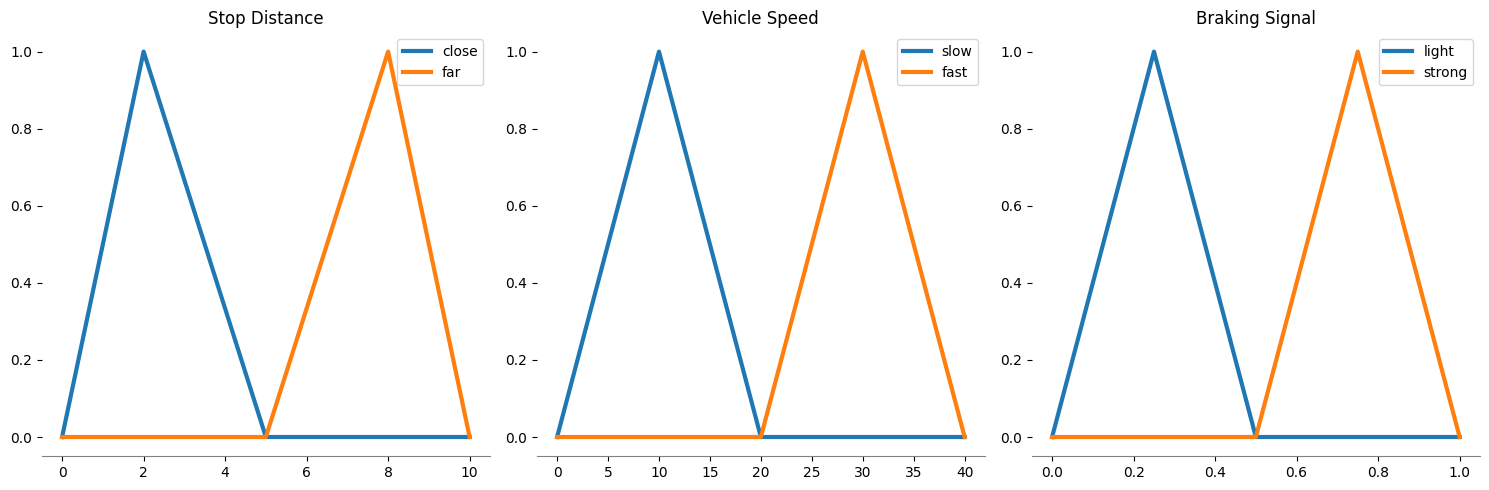

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
import traceback

# Define variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "close": ("trimf", 0, 2, 5),
            "far": ("trimf", 5, 8, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "slow": ("trimf", 0, 10, 20),
            "fast": ("trimf", 20, 30, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trimf", 0, 0.25, 0.5),
            "strong": ("trimf", 0.5, 0.75, 1)
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Debug information
print("Variables:")
for var_name, var in variables.items():
    print(f"  {var_name}: {var.terms.keys()}")

print("\nRules:")
for i, rule in enumerate(rules):
    print(f"  Rule {i+1}: {rule.premise} -> {rule.consequence}")

# Function to get braking signal
def get_braking_signal(distance, speed):
    try:
        print(f"\nComputing braking signal for distance={distance}, speed={speed}")
        result, _ = model(
            variables=variables,
            rules=rules,
            stop_distance=distance,
            vehicle_speed=speed
        )
        print(f"Result: {result}")
        return result['braking_signal']
    except Exception as e:
        print(f"Error in get_braking_signal: {e}")
        print("Traceback:")
        traceback.print_exc()
        return None

# Test the system
example_distance = 5
example_speed = 20
example_result = get_braking_signal(example_distance, example_speed)

print(f"\nFor distance {example_distance}m and speed {example_speed}km/h:")
if example_result is not None:
    print(f"Braking signal: {example_result}")
else:
    print("Failed to compute braking signal")

# Plot membership functions
try:
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    variables["stop_distance"].plot()
    plt.title("Stop Distance")
    plt.subplot(132)
    variables["vehicle_speed"].plot()
    plt.title("Vehicle Speed")
    plt.subplot(133)
    variables["braking_signal"].plot()
    plt.title("Braking Signal")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting membership functions: {e}")
    traceback.print_exc()

Variables:
  stop_distance: dict_keys(['very_close', 'close', 'medium', 'far'])
  vehicle_speed: dict_keys(['very_slow', 'slow', 'medium', 'fast'])
  braking_signal: dict_keys(['light', 'moderate', 'strong', 'emergency'])

Rules:
  Rule 1: [('stop_distance', 'far'), ('vehicle_speed', 'slow')] -> [('braking_signal', 'light')]
  Rule 2: [('stop_distance', 'medium'), ('vehicle_speed', 'medium')] -> [('braking_signal', 'moderate')]
  Rule 3: [('stop_distance', 'close'), ('vehicle_speed', 'fast')] -> [('braking_signal', 'strong')]
  Rule 4: [('stop_distance', 'very_close'), ('vehicle_speed', 'fast')] -> [('braking_signal', 'emergency')]
Error in model execution: 'slow'


Traceback (most recent call last):
  File "/tmp/ipykernel_14636/3661734246.py", line 83, in <module>
    result, certainty = model(
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 112, in __call__
    self._compute_modified_premise_memberships()
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 199, in _compute_modified_premise_memberships
    rule.modified_premise_memberships[fuzzyvar] = self.variables[
KeyError: 'slow'


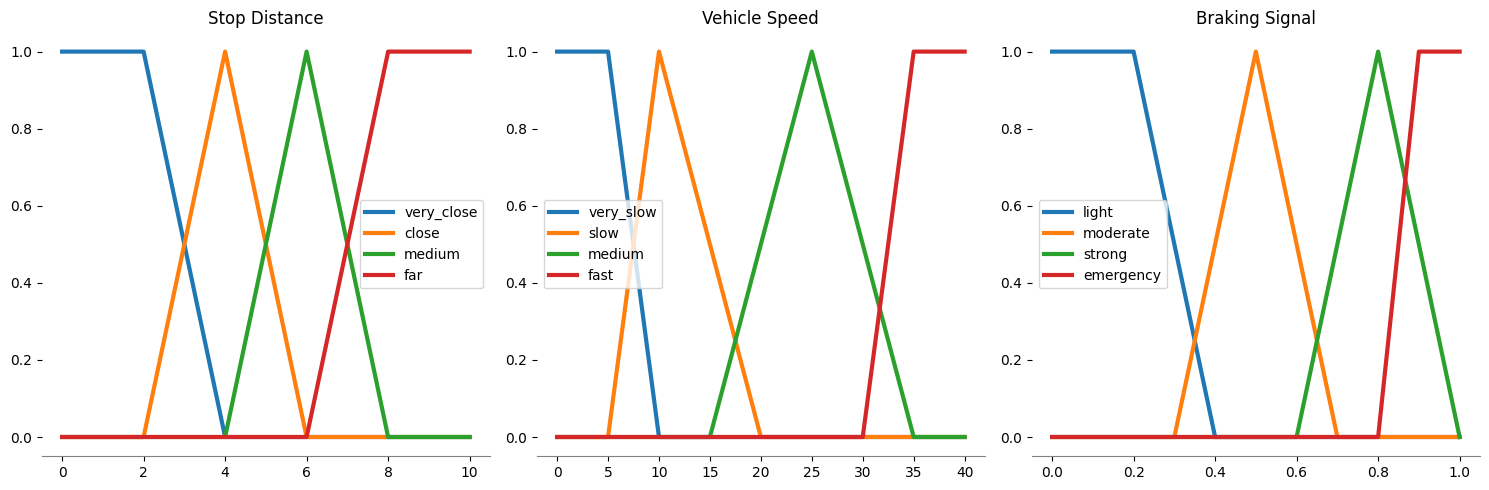

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
import traceback

# Define variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": ("trapmf", 0, 0, 2, 4),
            "close": ("trimf", 2, 4, 6),
            "medium": ("trimf", 4, 6, 8),
            "far": ("trapmf", 6, 8, 10, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": ("trapmf", 0, 0, 5, 10),
            "slow": ("trimf", 5, 10, 20),
            "medium": ("trimf", 15, 25, 35),
            "fast": ("trapmf", 30, 35, 40, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trapmf", 0, 0, 0.2, 0.4),
            "moderate": ("trimf", 0.3, 0.5, 0.7),
            "strong": ("trimf", 0.6, 0.8, 1),
            "emergency": ("trapmf", 0.8, 0.9, 1, 1)
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Debug information
print("Variables:")
for var_name, var in variables.items():
    print(f"  {var_name}: {var.terms.keys()}")

print("\nRules:")
for i, rule in enumerate(rules):
    print(f"  Rule {i+1}: {rule.premise} -> {rule.consequence}")

# Test the system
example_distance = 5
example_speed = 20

try:
    result, certainty = model(
        variables=variables,
        rules=rules,
        stop_distance=example_distance,
        vehicle_speed=example_speed
    )
    print(f"\nFor distance {example_distance}m and speed {example_speed}km/h:")
    print(f"Result: {result}")
    print(f"Certainty: {certainty}")
except Exception as e:
    print(f"Error in model execution: {e}")
    traceback.print_exc()

# Plot membership functions
try:
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    variables["stop_distance"].plot()
    plt.title("Stop Distance")
    plt.subplot(132)
    variables["vehicle_speed"].plot()
    plt.title("Vehicle Speed")
    plt.subplot(133)
    variables["braking_signal"].plot()
    plt.title("Braking Signal")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting membership functions: {e}")
    traceback.print_exc()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
import traceback

# Define variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": ("trapmf", 0, 0, 2, 4),
            "close": ("trimf", 2, 4, 6),
            "medium": ("trimf", 4, 6, 8),
            "far": ("trapmf", 6, 8, 10, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": ("trapmf", 0, 0, 5, 10),
            "slow": ("trimf", 5, 10, 20),
            "medium": ("trimf", 15, 25, 35),
            "fast": ("trapmf", 30, 35, 40, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trapmf", 0, 0, 0.2, 0.4),
            "moderate": ("trimf", 0.3, 0.5, 0.7),
            "strong": ("trimf", 0.6, 0.8, 1),
            "emergency": ("trapmf", 0.8, 0.9, 1, 1)
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

In [2]:
model(
    variables=variables,
    rules=rules,
    stop_distance=10,
    vehicle_speed=40
)

KeyError: 'slow'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference

# Define fuzzy variables with correct terms
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": ("trapmf", 0, 0, 2, 4),
            "close": ("trimf", 2, 4, 6),
            "medium": ("trimf", 4, 6, 8),
            "far": ("trapmf", 6, 8, 10, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": ("trapmf", 0, 0, 5, 10),
            "slow": ("trimf", 5, 10, 20),
            "medium": ("trimf", 15, 25, 35),
            "fast": ("trapmf", 30, 35, 40, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trapmf", 0, 0, 0.2, 0.4),
            "moderate": ("trimf", 0.3, 0.5, 0.7),
            "strong": ("trimf", 0.6, 0.8, 1),
            "emergency": ("trapmf", 0.8, 0.9, 1, 1)
        }
    )
}

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Adjust inputs to fall within the defined universe ranges
try:
    result = model(
        variables=variables,
        rules=rules,
        stop_distance=8,  # within (0, 10)
        vehicle_speed=35   # within (0, 40)
    )
    print("Fuzzy inference result:", result)
except KeyError as e:
    print(f"KeyError: {e}. Please check the term names in the rules and variables.")
except Exception as e:
    print("An error occurred:", e)


KeyError: 'slow'. Please check the term names in the rules and variables.


In [2]:
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
import traceback

# Define fuzzy variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": ("trapmf", 0, 0, 2, 4),
            "close": ("trimf", 2, 4, 6),
            "medium": ("trimf", 4, 6, 8),
            "far": ("trapmf", 6, 8, 10, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": ("trapmf", 0, 0, 5, 10),
            "slow": ("trimf", 5, 10, 20),
            "medium": ("trimf", 15, 25, 35),
            "fast": ("trapmf", 30, 35, 40, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trapmf", 0, 0, 0.2, 0.4),
            "moderate": ("trimf", 0.3, 0.5, 0.7),
            "strong": ("trimf", 0.6, 0.8, 1),
            "emergency": ("trapmf", 0.8, 0.9, 1, 1)
        }
    )
}

# Print out the terms to verify the term 'slow' exists
print("Terms in 'vehicle_speed':", variables["vehicle_speed"].terms)

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Adjust inputs to fall within the defined universe ranges
try:
    result = model(
        variables=variables,
        rules=rules,
        stop_distance=8,  # within (0, 10)
        vehicle_speed=35   # within (0, 40)
    )
    print("Fuzzy inference result:", result)
except KeyError as e:
    print(f"KeyError: {e}. Please check the term names in the rules and variables.")
    traceback.print_exc()
except Exception as e:
    print("An error occurred:", e)
    traceback.print_exc()


Terms in 'vehicle_speed': {'very_slow': array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 0.96, 0.94, 0.92,
       0.9 , 0.88, 0.86, 0.84, 0.82, 0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 ,
       0.68, 0.66, 0.64, 0.62, 0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48,
       0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26,
       0.24, 0.22, 0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  

Traceback (most recent call last):
  File "/tmp/ipykernel_11114/1114213516.py", line 73, in <module>
    result = model(
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 112, in __call__
    self._compute_modified_premise_memberships()
  File "/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/fuzzy_expert/inference.py", line 199, in _compute_modified_premise_memberships
    rule.modified_premise_memberships[fuzzyvar] = self.variables[
KeyError: 'slow'


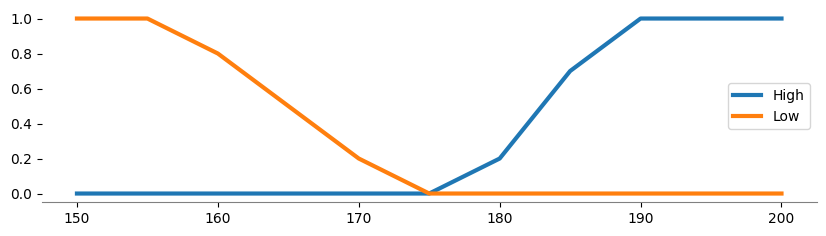

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable

variables = {
    "score": FuzzyVariable(
        universe_range=(150, 200),
        terms={
            "High": [(175, 0), (180, 0.2), (185, 0.7), (190, 1)],
            "Low": [(155, 1), (160, 0.8), (165, 0.5), (170, 0.2), (175, 0)],
        },
    ),
    "ratio": FuzzyVariable(
        universe_range=(0.1, 1),
        terms={
            "Goodr": [(0.3, 1), (0.4, 0.7), (0.41, 0.3), (0.42, 0)],
            "Badr": [(0.44, 0), (0.45, 0.3), (0.5, 0.7), (0.7, 1)],
        },
    ),
    #
    "credit": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Goodc": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
            "Badc": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
        },
    ),
    #
    "decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
    #
    "other_decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
}

plt.figure(figsize=(10, 2.5))
variables["score"].plot()

In [3]:
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
import traceback

# Define fuzzy variables
variables = {
    "stop_distance": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "very_close": ("trapmf", 0, 0, 2, 4),
            "close": ("trimf", 2, 4, 6),
            "medium": ("trimf", 4, 6, 8),
            "far": ("trapmf", 6, 8, 10, 10)
        }
    ),
    "vehicle_speed": FuzzyVariable(
        universe_range=(0, 40),
        terms={
            "very_slow": ("trapmf", 0, 0, 5, 10),
            "slow": ("trimf", 5, 10, 20),
            "medium": ("trimf", 15, 25, 35),
            "fast": ("trapmf", 30, 35, 40, 40)
        }
    ),
    "braking_signal": FuzzyVariable(
        universe_range=(0, 1),
        terms={
            "light": ("trapmf", 0, 0, 0.2, 0.4),
            "moderate": ("trimf", 0.3, 0.5, 0.7),
            "strong": ("trimf", 0.6, 0.8, 1),
            "emergency": ("trapmf", 0.8, 0.9, 1, 1)
        }
    )
}

# Print out the terms to verify the term 'slow' exists
print("Terms in 'vehicle_speed':", variables["vehicle_speed"].terms)

# Define fuzzy rules
rules = [
    FuzzyRule(
        premise=[("stop_distance", "far"), ("vehicle_speed", "slow")],
        consequence=[("braking_signal", "light")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "medium"), ("vehicle_speed", "medium")],
        consequence=[("braking_signal", "moderate")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "strong")]
    ),
    FuzzyRule(
        premise=[("stop_distance", "very_close"), ("vehicle_speed", "fast")],
        consequence=[("braking_signal", "emergency")]
    )
]

# Create the fuzzy system
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

Terms in 'vehicle_speed': {'very_slow': array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 0.96, 0.94, 0.92,
       0.9 , 0.88, 0.86, 0.84, 0.82, 0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 ,
       0.68, 0.66, 0.64, 0.62, 0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48,
       0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26,
       0.24, 0.22, 0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  

In [4]:
model(
    variables=variables,
    rules=rules,
    stop_distance=8,  # within (0, 10),
    vehicle_speed=35   # within (0, 40)
)

KeyError: 'slow'

/home/irman/anaconda3/envs/zed_sdk/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



For distance 5m and speed 20km/h:
Braking signal: 0.49999999999999983


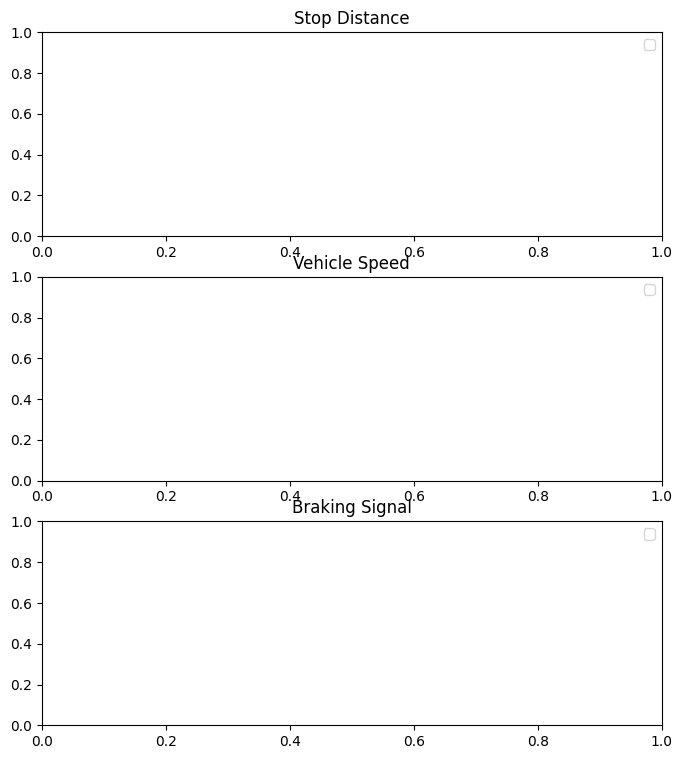

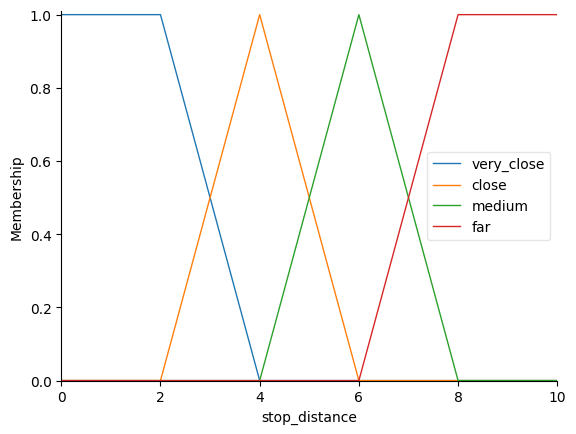

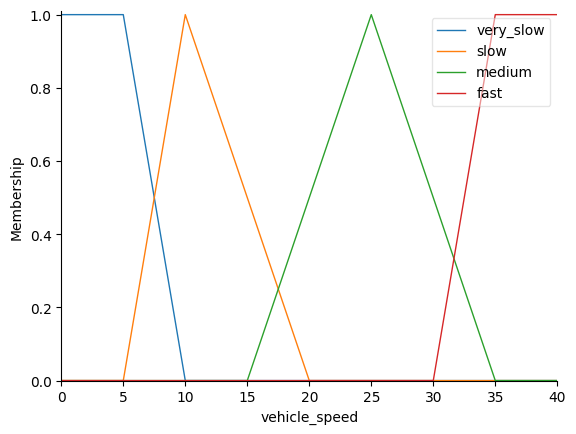

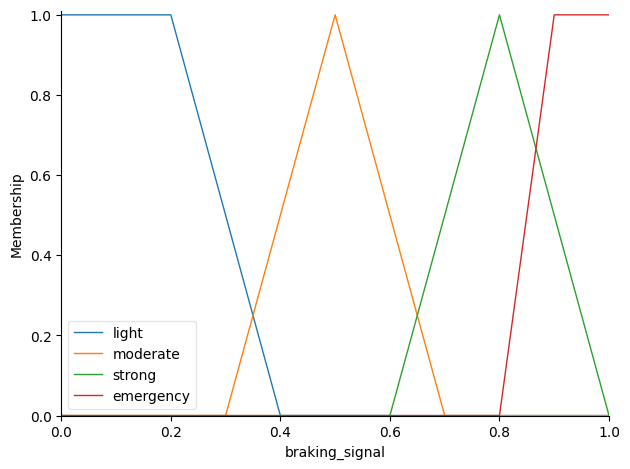

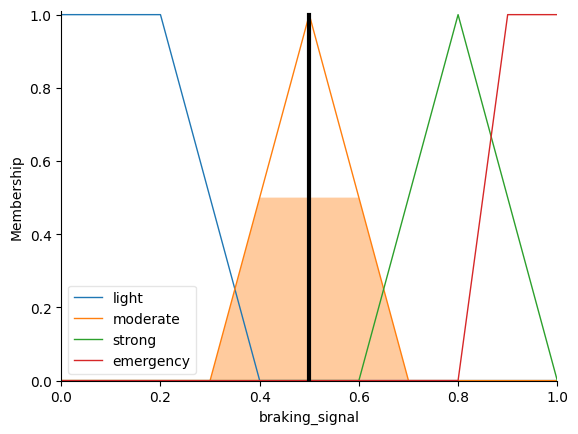

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define input variables
stop_distance = ctrl.Antecedent(np.arange(0, 11, 1), 'stop_distance')
vehicle_speed = ctrl.Antecedent(np.arange(0, 41, 1), 'vehicle_speed')

# Define output variable
braking_signal = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'braking_signal')

# Define membership functions for stop_distance
stop_distance['very_close'] = fuzz.trapmf(stop_distance.universe, [0, 0, 2, 4])
stop_distance['close'] = fuzz.trimf(stop_distance.universe, [2, 4, 6])
stop_distance['medium'] = fuzz.trimf(stop_distance.universe, [4, 6, 8])
stop_distance['far'] = fuzz.trapmf(stop_distance.universe, [6, 8, 10, 10])

# Define membership functions for vehicle_speed
vehicle_speed['very_slow'] = fuzz.trapmf(vehicle_speed.universe, [0, 0, 5, 10])
vehicle_speed['slow'] = fuzz.trimf(vehicle_speed.universe, [5, 10, 20])
vehicle_speed['medium'] = fuzz.trimf(vehicle_speed.universe, [15, 25, 35])
vehicle_speed['fast'] = fuzz.trapmf(vehicle_speed.universe, [30, 35, 40, 40])

# Define membership functions for braking_signal
braking_signal['light'] = fuzz.trapmf(braking_signal.universe, [0, 0, 0.2, 0.4])
braking_signal['moderate'] = fuzz.trimf(braking_signal.universe, [0.3, 0.5, 0.7])
braking_signal['strong'] = fuzz.trimf(braking_signal.universe, [0.6, 0.8, 1])
braking_signal['emergency'] = fuzz.trapmf(braking_signal.universe, [0.8, 0.9, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(stop_distance['far'] & vehicle_speed['slow'], braking_signal['light'])
rule2 = ctrl.Rule(stop_distance['medium'] & vehicle_speed['medium'], braking_signal['moderate'])
rule3 = ctrl.Rule(stop_distance['close'] & vehicle_speed['fast'], braking_signal['strong'])
rule4 = ctrl.Rule(stop_distance['very_close'] & vehicle_speed['fast'], braking_signal['emergency'])

# Create and simulate the fuzzy control system
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
braking_simulation = ctrl.ControlSystemSimulation(braking_ctrl)

# Test the system
example_distance = 5
example_speed = 20

braking_simulation.input['stop_distance'] = example_distance
braking_simulation.input['vehicle_speed'] = example_speed

# Compute the result
braking_simulation.compute()

print(f"\nFor distance {example_distance}m and speed {example_speed}km/h:")
print(f"Braking signal: {braking_simulation.output['braking_signal']}")

# Plot membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

stop_distance.view(ax=ax0)
ax0.set_title('Stop Distance')
ax0.legend()

vehicle_speed.view(ax=ax1)
ax1.set_title('Vehicle Speed')
ax1.legend()

braking_signal.view(ax=ax2)
ax2.set_title('Braking Signal')
ax2.legend()

plt.tight_layout()
plt.show()

# Visualize the result
braking_signal.view(sim=braking_simulation)
plt.show()

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define input variables
stop_distance = ctrl.Antecedent(np.arange(0, 11, 1), 'stop_distance')
vehicle_speed = ctrl.Antecedent(np.arange(0, 41, 1), 'vehicle_speed')

# Define output variable
braking_signal = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'braking_signal')

# Define membership functions for stop_distance
stop_distance['very_close'] = fuzz.trapmf(stop_distance.universe, [0, 0, 2, 4])
stop_distance['close'] = fuzz.trimf(stop_distance.universe, [2, 4, 6])
stop_distance['medium'] = fuzz.trimf(stop_distance.universe, [4, 6, 8])
stop_distance['far'] = fuzz.trapmf(stop_distance.universe, [6, 8, 10, 10])

# Define membership functions for vehicle_speed
vehicle_speed['very_slow'] = fuzz.trapmf(vehicle_speed.universe, [0, 0, 5, 10])
vehicle_speed['slow'] = fuzz.trimf(vehicle_speed.universe, [5, 10, 20])
vehicle_speed['medium'] = fuzz.trimf(vehicle_speed.universe, [15, 25, 35])
vehicle_speed['fast'] = fuzz.trapmf(vehicle_speed.universe, [30, 35, 40, 40])

# Define membership functions for braking_signal
braking_signal['light'] = fuzz.trapmf(braking_signal.universe, [0, 0, 0.2, 0.4])
braking_signal['moderate'] = fuzz.trimf(braking_signal.universe, [0.3, 0.5, 0.7])
braking_signal['strong'] = fuzz.trimf(braking_signal.universe, [0.6, 0.8, 1])
braking_signal['emergency'] = fuzz.trapmf(braking_signal.universe, [0.8, 0.9, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(stop_distance['far'] & vehicle_speed['slow'], braking_signal['light'])
rule2 = ctrl.Rule(stop_distance['medium'] & vehicle_speed['medium'], braking_signal['moderate'])
rule3 = ctrl.Rule(stop_distance['close'] & vehicle_speed['fast'], braking_signal['strong'])
rule4 = ctrl.Rule(stop_distance['very_close'] & vehicle_speed['fast'], braking_signal['emergency'])

# Create and simulate the fuzzy control system
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
braking_simulation = ctrl.ControlSystemSimulation(braking_ctrl)


In [3]:

# Test the system
example_distance = 5
example_speed = 20

braking_simulation.input['stop_distance'] = example_distance
braking_simulation.input['vehicle_speed'] = example_speed

# Compute the result
braking_simulation.compute()